# Hands-on 4: Linear regression in practice

In practice you're only concerned with getting the job done, not interested in the methode use, performing a regression with as little effort as possible. That's the goal of this hands-on.

We'll perform a univariate linear regression and a multivariate linear regression using the same training datasets as before. We use the very good python machine learning library scikit-learn. You can install it with `conda install scikit-learn`.

theta_0 -3.8957808783118537 theta_1 [1.19303364]


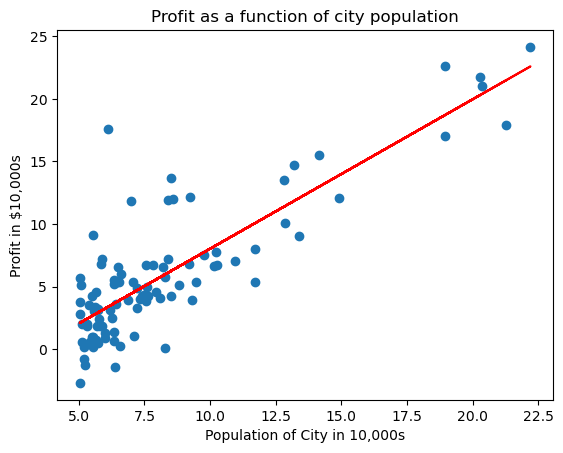

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read the training set
data = pd.read_csv("ex1data1.txt", header=None)  # read from dataset into Pandas DataFrame variable
data.head()  # view first few rows of the data
X = data.iloc[:, 0]  # read first column; upper case for matrix
y = data.iloc[:, 1]  # read second column; lower case for vector
m = len(y)  # number of training samples; lower case for scalar
X = np.array(X).reshape(-1, 1)  # transform to format that sklearn expects

# perform the regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# the theta's
print('theta_0', regr.intercept_, 'theta_1', regr.coef_)

# perform prediction on the complete training set
pred = regr.predict(X)

# visualize how the model fits the training data
plt.scatter(X, y)
plt.plot(X, pred, color="r")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit as a function of city population')
plt.show()

Note that the theta's are about equal to the ones of hands-on 1, univariate linear regression. Some confirmation that our own coding effort does not contain obvious errors.

Now we're going to do the multivariate linear regression.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# read the training set
data = pd.read_csv('ex1data2.txt', sep=',', header=None)
data.head()  # view first few rows of the data
X = data.iloc[:, 0:2]  # read first two columns into X; in from:to the to is not included
y = data.iloc[:, 2]  # read the third column into y
m = len(y)  # number of training samples

# normalize using scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# perform the regression using scikit-learn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
pred = regr.predict(X)

# the theta's
print('theta_0', regr.intercept_, 'theta_1 and theta_2', regr.coef_)

# use the result of learning to predict the house value
# no need to perform feature normalization ourselves; the sklearn regressor will do this for us"
x_input = np.array([1650, 3]).reshape(1, -1)  # predict for size of house = 1650, #bedrooms = 3
x_input = scaler.transform(x_input)
predict = regr.predict(x_input)
print("For size of house = 1650, #bedrooms = 3, we predict a house value of " + str(predict) + " dollar")

theta_0 340412.6595744681 theta_1 and theta_2 [109447.79646964  -6578.35485416]
For size of house = 1650, #bedrooms = 3, we predict a house value of [293081.4643349] dollar


Notice that the values of $\Theta$ and the prediction result are different from the values found in hands-on 2, multivariate regression! What is wrong?

Nothing to worry! In hands-on 2, multivariate regression, increase `num_iters` to 40000 (and comment out the two tests that use `np.testing.assert_array_almost_equal_nulp`) and rerun. Values of $\Theta$ and the prediction result are very similar now. A nice confirmation that our coding effort is correct!